In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 58)

In [2]:
PopData = "C:\\Users\\mgeam\\BestCityToLiveCA\\Resources\\CrimeData\\CountyPopulation.csv"
open(PopData)
os.path.exists(PopData)

True

In [3]:
#Create County Population Table

PopTable = pd.read_csv(PopData)
CleanPopTable = PopTable.dropna(axis='rows')
CleanerPopTable = ViolentCrime = CleanPopTable.drop([113, 114, 115, 116, 117])
CleanestPopTable = CleanerPopTable.set_index('County')
IntPopTable = CleanestPopTable.apply(pd.to_numeric, errors='coerce')
IntPopTable

,Population
County,
Alameda,1559308
Alpine,1202
Amador,37159
Butte,221578
Calaveras,44921
Colusa,21424
Contra Costa,1081232
Del Norte,28066
El Dorado,181465


In [5]:
CrimeData = "C:\\Users\\mgeam\\BestCityToLiveCA\\CrimeRates.csv"
open(CrimeData)
os.path.exists(CrimeData)

True

In [6]:
CrimeTable = pd.read_csv(CrimeData)

In [7]:
pd.set_option('display.max_columns', 58)
pd.set_option('display.max_rows', 25)

In [8]:
CrimeTable

,Crimes,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,Del Norte,El Dorado,Fresno,Glenn,Humboldt,Imperial,Inyo,Kern,Kings,Lake,Lassen,Los Angeles,Madera,Marin,Mariposa,Mendocino,Merced,Modoc,Mono,Monterey,Napa,Nevada,Orange,Placer,Plumas,Riverside,Sacramento,San Benito,San Bernardino,San Diego,San Francisco,San Joaquin,San Luis Obispo,San Mateo,Santa Barbara,Santa Cruz,Shasta,Sierra,Siskiyou,Solano,Sonoma,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Ventura,Yolo,Yuba
0,Violent Crimes,9734,13,110,1024,145,58,4138,109,323,4737,91,626,589,94,5567,757,347,274,56416,830,516,79,336,1520,43,67,1433,753,238,6797,597,128,7511,6765,147,12219,11409,6092,5952,630,1837,1529,1106,623,1,181,2114,2016,2908,318,256,61,1692,195,1830,637,326
1,Homicide,96,0,1,7,1,0,54,2,5,55,2,6,7,1,84,4,5,0,508,3,1,0,3,12,0,0,15,1,3,57,7,1,118,78,1,147,86,40,50,5,10,17,6,6,0,6,21,9,25,4,3,2,20,2,24,6,7
2,Rape (Forcible Rape prior to 2014),702,2,8,180,34,15,320,13,59,267,12,66,28,18,455,71,43,15,4169,68,44,8,45,82,4,18,139,90,16,894,94,9,496,407,22,890,1106,330,301,95,322,211,137,63,0,13,264,277,170,32,46,10,194,68,232,87,41
3,Rape,668,2,8,124,34,14,299,12,56,231,11,66,25,18,429,69,41,15,3969,61,41,7,38,82,4,16,135,87,15,820,92,9,447,394,21,813,988,275,281,86,308,200,119,61,0,13,262,267,161,31,44,10,188,68,231,83,41
4,Attempted Rape,34,0,0,56,0,1,21,1,3,36,1,0,3,0,26,2,2,0,200,7,3,1,7,0,0,2,4,3,1,74,2,0,49,13,1,77,118,55,20,9,14,11,18,2,0,0,2,10,9,1,2,0,6,0,1,4,0
5,Robbery,4916,0,9,167,9,9,1519,26,55,918,16,149,80,9,1238,88,62,10,18607,94,145,2,51,202,2,1,368,70,17,2209,131,5,2149,2035,29,3103,2891,3173,1560,77,552,295,182,77,0,9,661,243,724,65,30,9,389,13,527,176,61
6,Firearm,1707,0,0,38,3,3,410,2,7,248,3,42,8,0,364,17,13,2,4443,15,19,1,10,40,0,0,115,9,6,442,16,1,568,476,4,945,427,368,396,13,79,63,25,5,0,2,176,47,182,12,5,1,105,3,116,35,13
7,Knife or Cutting Instrument,283,0,0,12,1,2,97,1,10,80,0,20,10,0,141,6,5,1,1792,13,18,0,2,20,1,0,36,4,3,305,3,0,166,140,2,266,312,213,129,9,48,32,34,2,0,1,40,26,63,3,5,0,49,0,89,9,7
8,Other Weapon,339,0,0,16,0,1,97,0,4,72,0,9,6,0,129,5,6,2,2276,10,7,1,1,23,1,0,24,14,1,275,16,2,567,256,4,289,449,314,257,5,29,51,22,52,0,1,39,28,72,11,4,6,27,3,64,10,7
9,Strong-Arm,2587,0,9,101,5,3,915,23,34,518,13,78,56,9,604,60,38,5,10096,56,101,0,38,119,0,1,193,43,7,1187,96,2,848,1163,19,1603,1703,2278,778,50,396,149,101,18,0,5,406,142,407,39,16,2,208,7,258,122,34


In [218]:
ViolentCrime = CrimeTable.drop([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
del ViolentCrime['Crimes']
TransposeViolentCrime = ViolentCrime.T
ViolentCrimeTable = TransposeViolentCrime.sort_values(by=[0])
MergeViolentCrimeTable = ViolentCrimeTable.merge(IntPopTable, left_index=True, right_index=True)
MergeViolentCrimeTable['Violent Crime Rate'] = MergeViolentCrimeTable[0]/IntPopTable['Population']
FinalViolentCrimeRateTable = MergeViolentCrimeTable.sort_values(by=['Violent Crime Rate'])
FinalViolentCrimeRateTable['Violent Crime Rate'] = FinalViolentCrimeRateTable['Violent Crime Rate'].map("{:.2%}".format)
FinalViolentCrimeRateTable

,0,Population,Violent Crime Rate
Sierra,1,3019,0.03%
Placer,597,361518,0.17%
El Dorado,323,181465,0.18%
Marin,516,256802,0.20%
Ventura,1830,835790,0.22%
Orange,6797,3086331,0.22%
San Luis Obispo,630,274184,0.23%
Nevada,238,98606,0.24%
San Mateo,1837,739837,0.25%
San Benito,147,56888,0.26%


In [219]:
FinalViolentCrimeRateTable.to_csv('Total Violent Crime.csv', index=True)

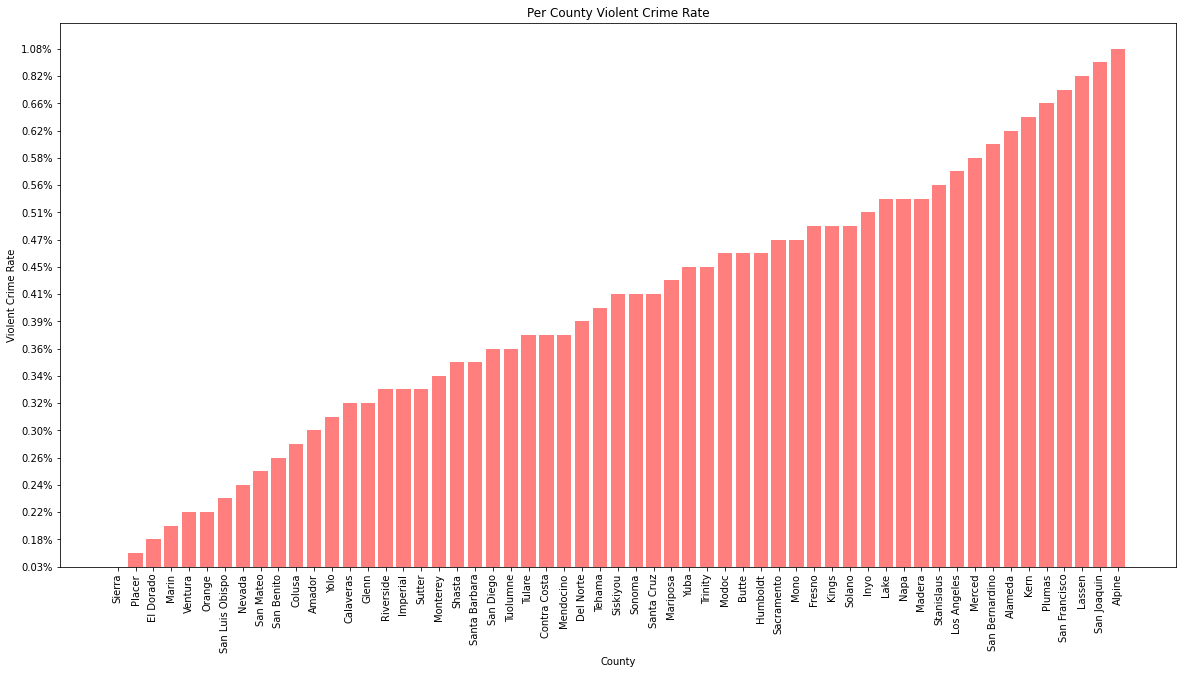

In [319]:
PlotViolentCrime = FinalViolentCrimeRateTable.reset_index()
x_axis = np.arange(len(PlotViolentCrime))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,10))
plt.bar(x_axis, PlotViolentCrime["Violent Crime Rate"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, PlotViolentCrime["index"], rotation="vertical") 
plt.yticks(np.arange(0, 40, step=2))
plt.xlabel('County')
plt.title('Per County Violent Crime Rate')
plt.ylabel('Violent Crime Rate')
plt.savefig('Per County Violent Crime Rate', dpi=300, bbox_inches='tight')

In [258]:
PropertyCrime = CrimeTable.drop([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
del PropertyCrime['Crimes']
TransposePropertyCrime = PropertyCrime.T
PropertyCrimeTable = TransposePropertyCrime.sort_values(by=[11])
MergePropertyCrimeTable = PropertyCrimeTable.merge(IntPopTable, left_index=True, right_index=True)
MergePropertyCrimeTable['Property Crime Rate'] = MergePropertyCrimeTable[11]/IntPopTable['Population']
FinalPropertyCrimeTable = MergePropertyCrimeTable.sort_values(by=['Property Crime Rate'])
FinalPropertyCrimeTable['Property Crime Rate'] = FinalPropertyCrimeTable['Property Crime Rate'].map("{:.2%}".format)
FinalPropertyCrimeTable

,11,Population,Property Crime Rate
Modoc,66,9335,0.71%
San Benito,472,56888,0.83%
Mariposa,182,17946,1.01%
Sierra,31,3019,1.03%
Nevada,1191,98606,1.21%
Lassen,419,33356,1.26%
Mono,187,14193,1.32%
Shasta,2413,178520,1.35%
Sonoma,6760,491790,1.37%
El Dorado,2559,181465,1.41%


In [259]:
FinalPropertyCrimeTable.to_csv('Total Prperty Crime.csv', index=True)

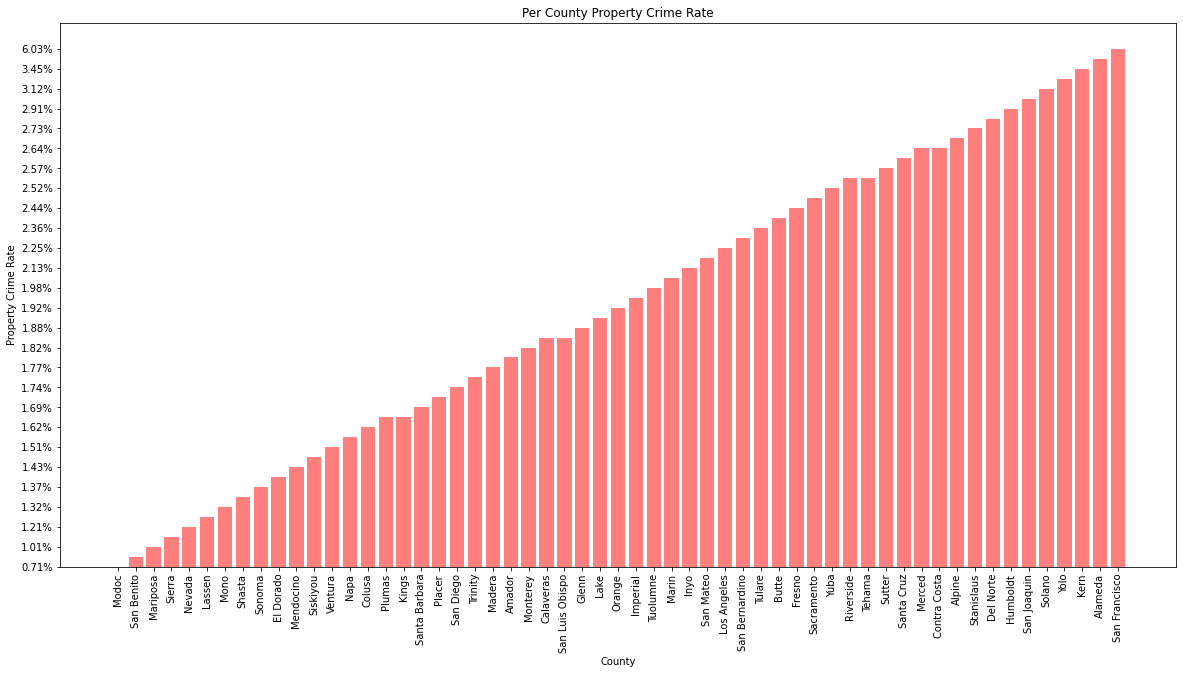

In [318]:
PlotPropertyCrime = FinalPropertyCrimeTable.reset_index()
x_axis = np.arange(len(PlotPropertyCrime))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,10))
plt.bar(x_axis, PlotPropertyCrime["Property Crime Rate"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, PlotPropertyCrime["index"], rotation="vertical") 
plt.yticks(np.arange(0, 53, step=2))
plt.xlabel('County')
plt.title('Per County Property Crime Rate')
plt.ylabel('Property Crime Rate')
plt.savefig('Per County Property Crime Rate', dpi=300, bbox_inches='tight')

In [265]:
AllCrimeTable = PropertyCrimeTable.merge(TransposeViolentCrime, left_index=True, right_index=True)
MergeAllCrimeTable = AllCrimeTable.merge(IntPopTable, left_index=True, right_index=True)
MergeAllCrimeTable['Crime Rate'] = (MergeAllCrimeTable[11] + MergeAllCrimeTable[0])/IntPopTable['Population']
AllCrimeRateTable = MergeAllCrimeTable.sort_values(by=['Crime Rate'])
AllCrimeRateTable['Crime Rate'] = AllCrimeRateTable['Crime Rate'].map("{:.2%}".format)
AllCrimeRateTable

,11,0,Population,Crime Rate
Sierra,31,1,3019,1.06%
San Benito,472,147,56888,1.09%
Modoc,66,43,9335,1.17%
Nevada,1191,238,98606,1.45%
Mariposa,182,79,17946,1.45%
El Dorado,2559,323,181465,1.59%
Shasta,2413,623,178520,1.70%
Ventura,12634,1830,835790,1.73%
Sonoma,6760,2016,491790,1.78%
Mono,187,67,14193,1.79%


In [14]:
AllCrimeRateTable.to_csv('Total Crime.csv', index=True)

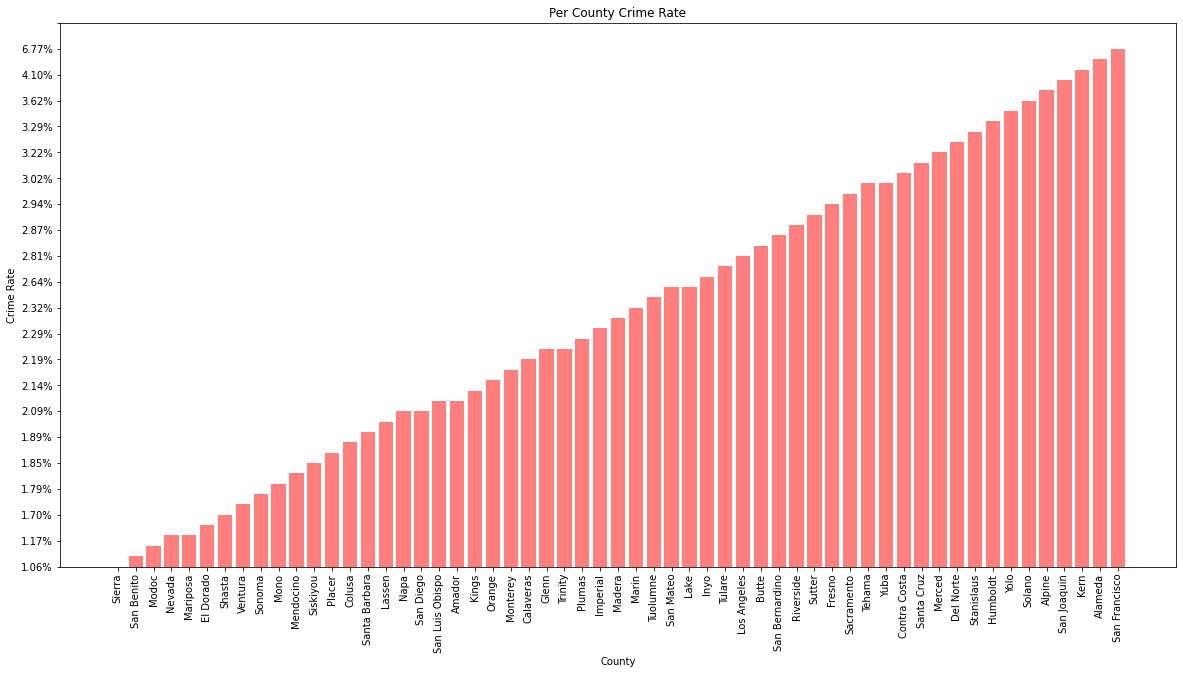

In [317]:
PlotAllCrime = AllCrimeRateTable.reset_index()
x_axis = np.arange(len(PlotAllCrime))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,10))
plt.bar(x_axis, PlotAllCrime["Crime Rate"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, PlotAllCrime["index"], rotation="vertical") 
plt.yticks(np.arange(0, 55, step=2.5))
plt.title('Per County Crime Rate')
plt.xlabel('County')
plt.ylabel('Crime Rate')
plt.savefig('Per County Crime Rate', dpi=300, bbox_inches='tight')

In [322]:
Robbery = CrimeTable.drop([0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
del Robbery['Crimes']
TransposeRobbery = Robbery.T
RobberyTable = TransposeRobbery.sort_values(by=[5])
MergeRobberyTable = RobberyTable.merge(IntPopTable, left_index=True, right_index=True)
MergeRobberyTable['Robbery Rate'] = MergeRobberyTable[5]/IntPopTable['Population']
FinalRobberyTable = MergeRobberyTable.sort_values(by=['Robbery Rate'])
FinalRobberyTable['Robbery Rate'] = FinalRobberyTable['Robbery Rate'].map("{:.3%}".format)
FinalRobberyTable

,5,Population,Robbery Rate
Alpine,0,1202,0.000%
Sierra,0,3019,0.000%
Mono,1,14193,0.007%
Mariposa,2,17946,0.011%
Nevada,17,98606,0.017%
Calaveras,9,44921,0.020%
Siskiyou,9,44261,0.020%
Modoc,2,9335,0.021%
Tuolumne,13,54347,0.024%
Amador,9,37159,0.024%


In [323]:
FinalRobberyTable.to_csv('Total Robbery.csv', index=True)

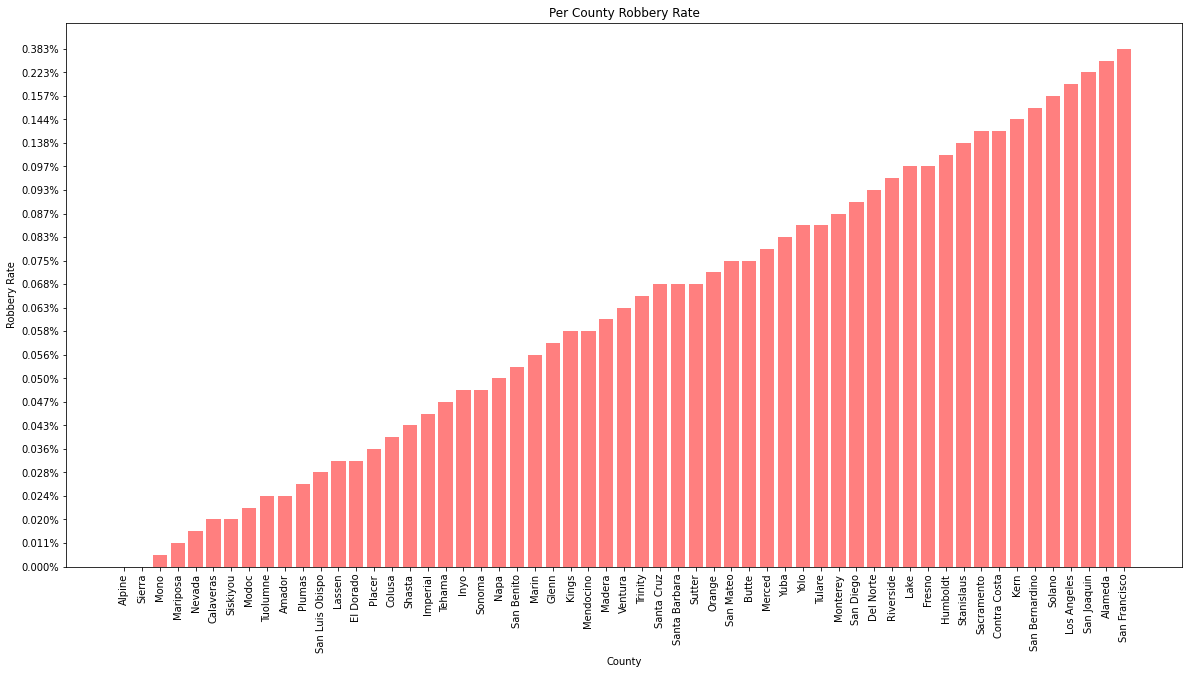

In [326]:
PlotRobbery = FinalRobberyTable.reset_index()
x_axis = np.arange(len(PlotRobbery))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,10))
plt.bar(x_axis, PlotRobbery["Robbery Rate"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, PlotRobbery["index"], rotation="vertical")
plt.yticks(np.arange(0, 45, step=2))
plt.title('Per County Robbery Rate')
plt.xlabel('County')
plt.ylabel('Robbery Rate')
plt.savefig('Per County Robbery Rate', dpi=300, bbox_inches='tight')

In [327]:
Burglary = CrimeTable.drop([0, 1, 2, 3, 4, 6, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
del Burglary['Crimes']
TransposeBurglary = Burglary.T
BurglaryTable = TransposeBurglary.sort_values(by=[12])
MergeBurglaryTable = BurglaryTable.merge(IntPopTable, left_index=True, right_index=True)
MergeBurglaryTable['Burglary Rate'] = MergeBurglaryTable[12]/IntPopTable['Population']
FinalBurglaryTable = MergeBurglaryTable.sort_values(by=['Burglary Rate'])
FinalBurglaryTable['Burglary Rate'] = FinalBurglaryTable['Burglary Rate'].map("{:.3%}".format)
FinalBurglaryTable

,12,Population,Burglary Rate
San Benito,96,56888,0.169%
Modoc,20,9335,0.214%
Ventura,1946,835790,0.233%
San Diego,7694,3183143,0.242%
Sonoma,1228,491790,0.250%
Mono,38,14193,0.268%
Kings,410,151390,0.271%
Placer,992,361518,0.274%
Orange,8529,3086331,0.276%
Napa,395,139253,0.284%


In [328]:
FinalBurglaryTable.to_csv('Total Burglary.csv', index=True)

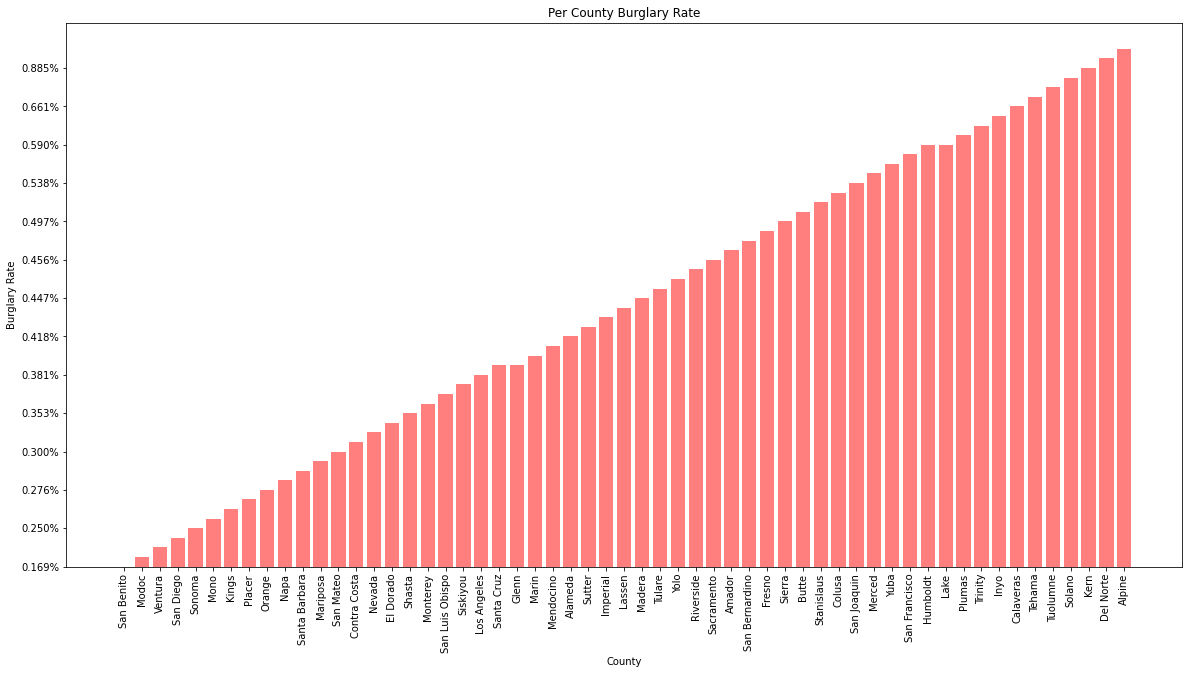

In [354]:
PlotBurglary = FinalBurglaryTable.reset_index()
x_axis = np.arange(len(PlotBurglary))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,10))
plt.bar(x_axis, PlotBurglary["Burglary Rate"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, PlotBurglary["index"], rotation="vertical")
plt.yticks(np.arange(0, 55, step=4))
plt.title('Per County Burglary Rate')
plt.xlabel('County')
plt.ylabel('Burglary Rate')
plt.savefig('Per County Burglary Rate', dpi=300, bbox_inches='tight')

In [355]:
Homicide = CrimeTable.drop([0, 2, 3, 4, 6, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
del Homicide['Crimes']
TransposeHomicide = Homicide.T
HomicideTable = TransposeHomicide.sort_values(by=[1])
MergeHomicideTable = HomicideTable.merge(IntPopTable, left_index=True, right_index=True)
MergeHomicideTable['Homicide Rate'] = MergeHomicideTable[1]/IntPopTable['Population']
FinalHomicideTable = MergeHomicideTable.sort_values(by=['Homicide Rate'])
FinalHomicideTable['Homicide Rate'] = FinalHomicideTable['Homicide Rate'].map("{:.5%}".format)
FinalHomicideTable

,1,Population,Homicide Rate
Mono,0,14193,0.00000%
Mariposa,0,17946,0.00000%
Modoc,0,9335,0.00000%
Lassen,0,33356,0.00000%
Colusa,0,21424,0.00000%
Sierra,0,3019,0.00000%
Alpine,0,1202,0.00000%
Marin,1,256802,0.00039%
Napa,1,139253,0.00072%
San Mateo,10,739837,0.00135%


In [356]:
FinalHomicideTable.to_csv('Total Homicide.csv', index=True)

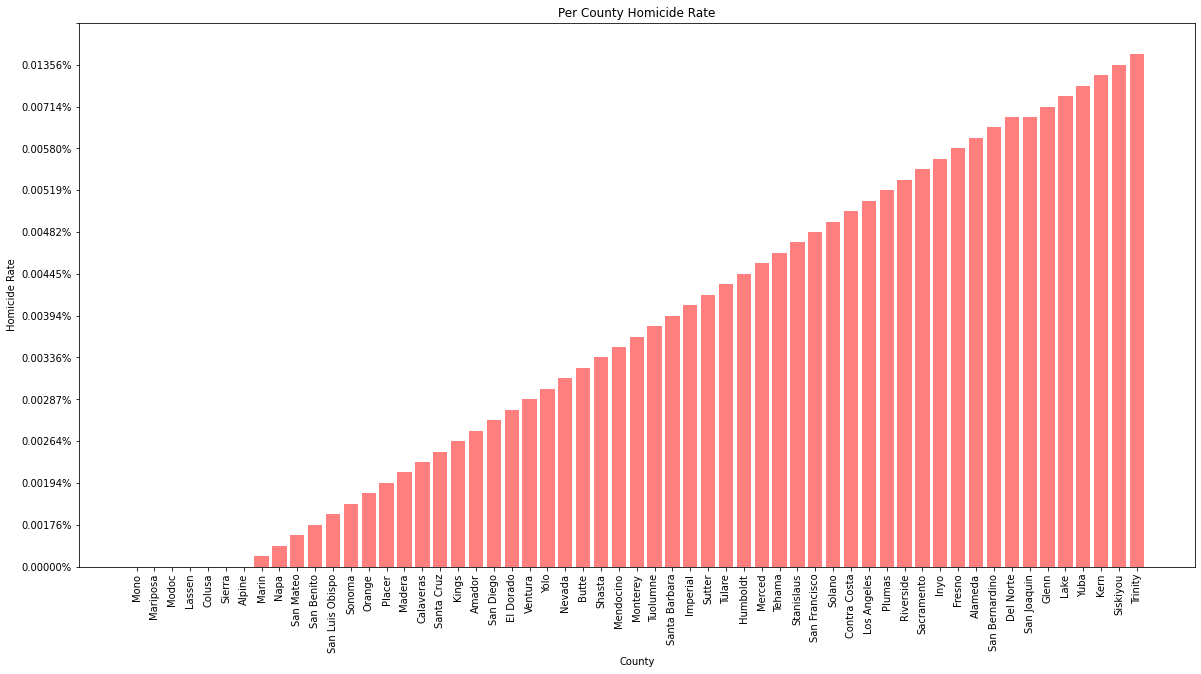

In [357]:
PlotHomicide = FinalHomicideTable.reset_index()
x_axis = np.arange(len(PlotHomicide))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,10))
plt.bar(x_axis, PlotHomicide["Homicide Rate"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, PlotHomicide["index"], rotation="vertical")
plt.yticks(np.arange(0, 55, step=4))
plt.title('Per County Homicide Rate')
plt.xlabel('County')
plt.ylabel('Homicide Rate')
plt.savefig('Per County Homicide Rate', dpi=300, bbox_inches='tight')

In [358]:
Arson = CrimeTable.drop([0, 1, 2, 3, 4, 6, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22])
del Arson['Crimes']
TransposeArson = Arson.T
ArsonTable = TransposeArson.sort_values(by=[23])
MergeArsonTable = ArsonTable.merge(IntPopTable, left_index=True, right_index=True)
MergeArsonTable['Arson Rate'] = MergeArsonTable[23]/IntPopTable['Population']
FinalArsonTable = MergeArsonTable.sort_values(by=['Arson Rate'])
FinalArsonTable['Arson Rate'] = FinalArsonTable['Arson Rate'].map("{:.3%}".format)
FinalArsonTable

,23,Population,Arson Rate
Modoc,0,9335,0.000%
Alpine,0,1202,0.000%
Inyo,0,18439,0.000%
Calaveras,0,44921,0.000%
Sierra,0,3019,0.000%
Mariposa,0,17946,0.000%
El Dorado,4,181465,0.002%
Siskiyou,1,44261,0.002%
Lassen,1,33356,0.003%
Nevada,4,98606,0.004%


In [359]:
FinalArsonTable.to_csv('Total Arson.csv', index=True)

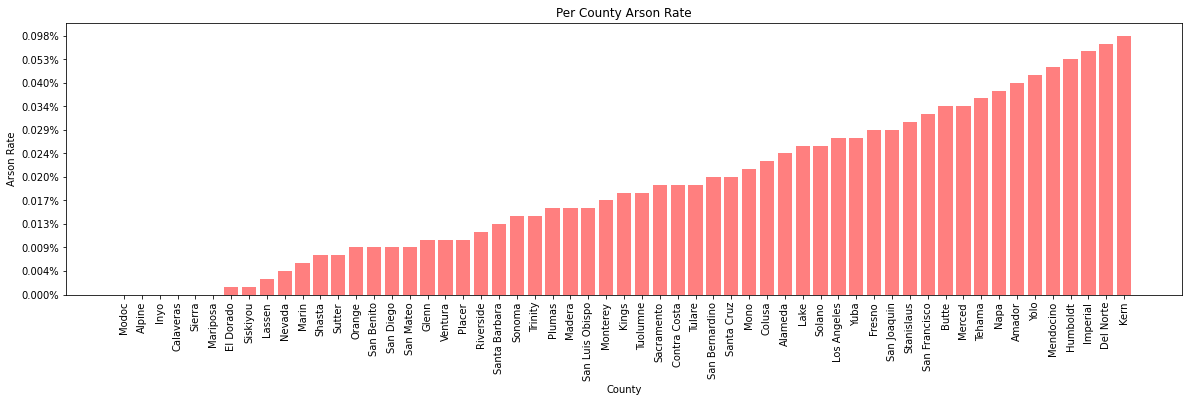

In [360]:
PlotArson = FinalArsonTable.reset_index()
x_axis = np.arange(len(PlotArson))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,5))
plt.bar(x_axis, PlotArson["Arson Rate"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, PlotArson["index"], rotation="vertical")
plt.yticks(np.arange(0, 35, step=3))
plt.title('Per County Arson Rate')
plt.xlabel('County')
plt.ylabel('Arson Rate')
plt.savefig('Per County Arson Rate', dpi=300, bbox_inches='tight')